In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.cm as cm
import json
import matplotlib.colors

In [2]:
orders = pd.read_csv(r"D:\MyPythonProject\Gett Project\datasets\data_orders.csv")

offers = pd.read_csv(r"D:\MyPythonProject\Gett Project\datasets\data_offers.csv")

df = orders.merge(right=offers, how= "inner", on= "order_gk")

In [3]:
df.sample(n=10, random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628


In [4]:
df["order_status"] = "System Reject"
df.loc[df["order_status_key"] == 4, "order_status"] = "Client Cancelled"

df["is_driver_assigned"] = "No"
df.loc[df["is_driver_assigned_key"] == 1, "is_driver_assigned"] = "Yes"

df.drop(columns= ["is_driver_assigned_key", "order_status_key"], inplace= True)

In [5]:
df = df.rename(columns={"order_datetime" : "order_time"})

In [6]:
df.sample(n=10,random_state=42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,order_status,is_driver_assigned
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Client Cancelled,Yes
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,Client Cancelled,No
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,Client Cancelled,No
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,Client Cancelled,No
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,Client Cancelled,No
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,NaN,300051413313,System Reject,No
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,6.0,300051090742,Client Cancelled,No
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,NaN,300051125957,System Reject,No
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,113.0,300052078801,Client Cancelled,No
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,47.0,300051178628,Client Cancelled,Yes


Question 1

Build up a distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. 
Analyse the resulting plot. Which category has the highest number of orders?

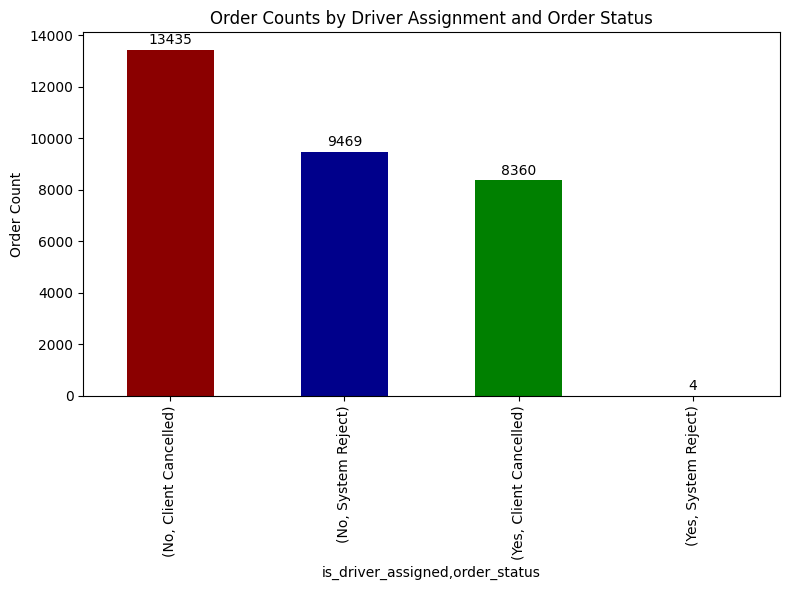

In [7]:
import matplotlib.pyplot as plt

# Group the data
df_grouped = df.groupby(["is_driver_assigned", "order_status"])["order_gk"].count()

colors = ['darkred', 'darkblue', 'green', 'orange']

# Create the bar plot
ax = df_grouped.plot(kind="bar", color = colors , figsize=(8, 6))

# Add labels on top of each bar
for i, v in enumerate(df_grouped):
    ax.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title("Order Counts by Driver Assignment and Order Status")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()


Question 2: 

Plot the distribution of failed orders by hours. 
Is there a trend that certain hours have an abnormally high proportion of one category or another?
What hours are the biggest fails? How can this be explained?

In [8]:
df["order_hour"] = df["order_time"].str.split(":").apply(lambda split:split[0])
hourly_counts = df.groupby(by = "order_hour")["order_gk"].count()

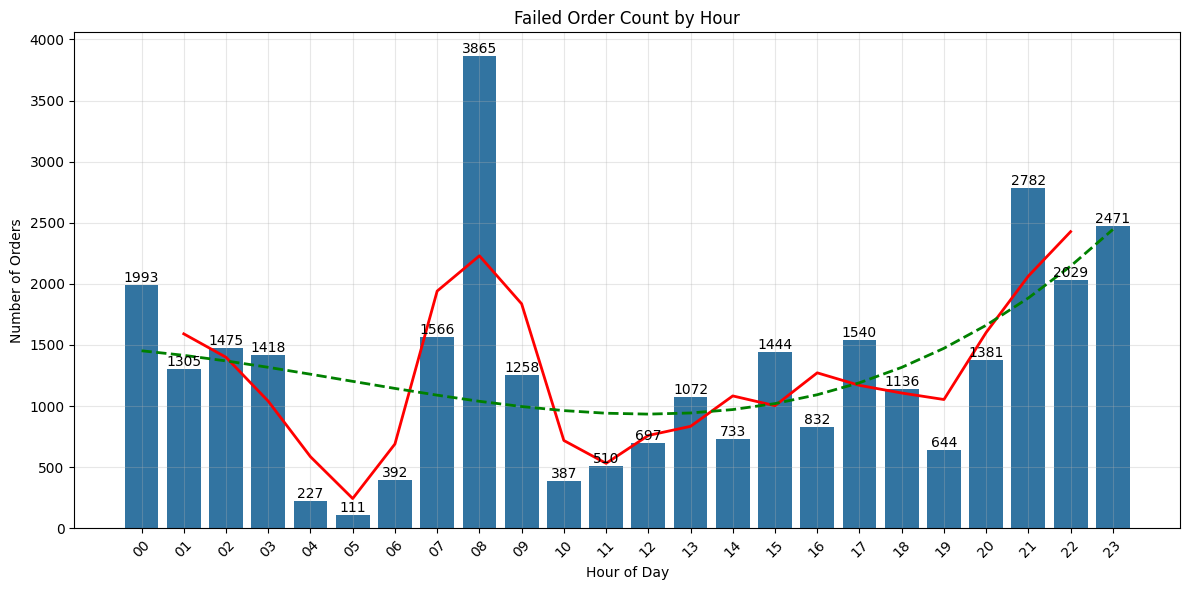

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x=hourly_counts.index,y=hourly_counts.values)

# Add rolling average trend line
rolling_mean = hourly_counts.rolling(window=3, center= True).mean()
plt.plot(hourly_counts.index, rolling_mean, color='red', linewidth=2, label='3-Hour Moving Average')

# Add polynomial trend line
z = np.polyfit(range(len(hourly_counts)), hourly_counts, 3)
p = np.poly1d(z)

plt.plot(range(len(hourly_counts)), p(range(len(hourly_counts))),
         color='green', linestyle='--', linewidth=2, label='Polynomial Trend')

plt.title('Failed Order Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(True, alpha = 0.3)
plt.xticks(rotation = 45);

#Add value labels to bar
for i,v in enumerate(hourly_counts):
    plt.text(i, v, str(v), ha='center', va = 'bottom')

plt.tight_layout()
plt.show()

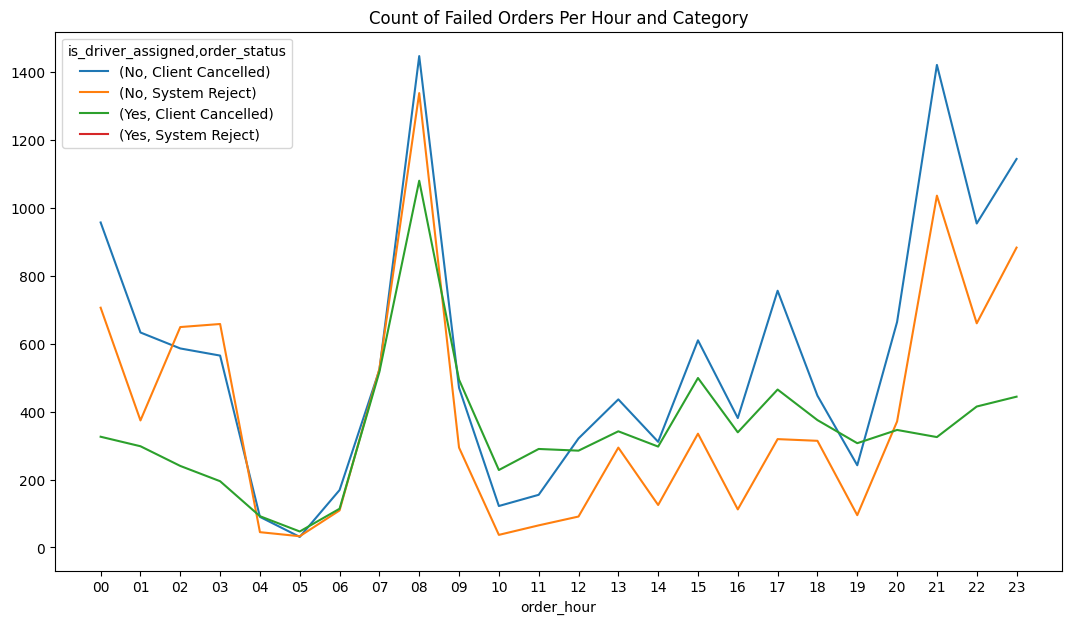

In [10]:
grouped = df.groupby(by= ["order_hour","is_driver_assigned", "order_status"])["order_gk"].count()

_ = grouped.reset_index().pivot(index="order_hour" ,
                                columns= ["is_driver_assigned", "order_status"],
                                values= "order_gk").plot(xticks=range(0,24),
                                                         figsize=(13,7),
                                                         title="Count of Failed Orders Per Hour and Category")


Question 3: Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

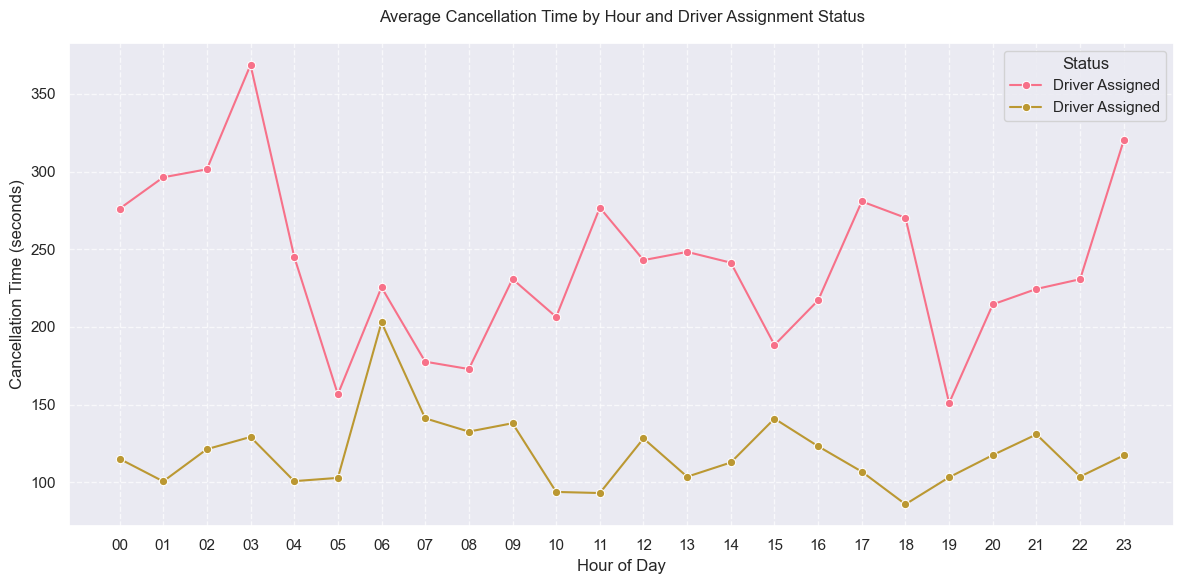

In [11]:
grouped2 = df.groupby(by=["order_hour","is_driver_assigned"])["cancellations_time_in_seconds"].mean()

sns.set()
sns.set_palette("husl")

plt.figure(figsize=(12,6))

sns.lineplot(data= grouped2.loc[(slice(None), 'Yes')].reset_index(),
             x='order_hour',
             y='cancellations_time_in_seconds',
             label = 'Driver Assigned',
             marker = 'o')

sns.lineplot(data= grouped2.loc[(slice(None), 'No')].reset_index(),
             x='order_hour',
             y='cancellations_time_in_seconds',
             label = 'Driver Assigned',
             marker = 'o')

plt.title('Average Cancellation Time by Hour and Driver Assignment Status', pad=15)
plt.xlabel('Hour of Day')
plt.ylabel('Cancellation Time (seconds)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Status')

plt.xticks(range(0, 24))

plt.tight_layout()

plt.show()

Question 4 : Plot the distribution of average ETA by hours. How can this plot be explained?

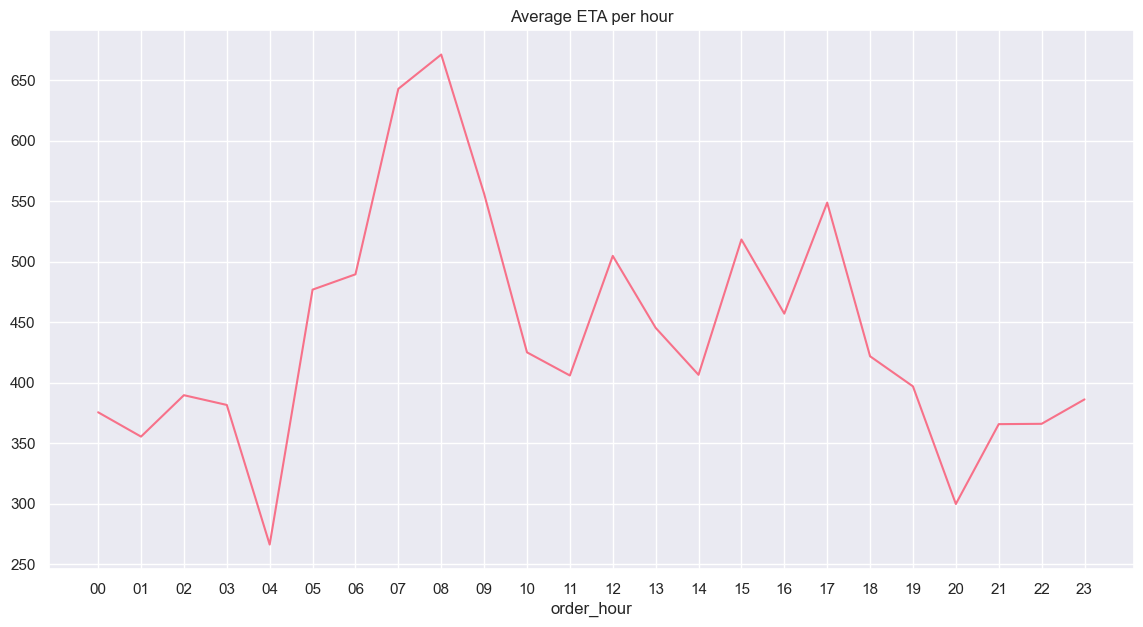

In [20]:
grouped3 = df.groupby(by= ["order_hour"])["m_order_eta"].mean().plot(figsize=(14,7),
                                                                   xticks=range(0,24),
                                                                   title= 'Average ETA per hour')